In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

In [2]:
#reading
df = pd.read_csv('Trendyol_Sales_Data_Dirty.csv')

In [3]:
df.shape
#(1100, 14)


(1100, 14)

In [4]:
df.head()

,YEAR,month,CITY,CatEgory,PayMent_methoD,DEVICE_type,PROMOTion_used,CustSegment,ORDer_Value,Items sold,shipping_cost,Delivery_time,Product_rating,DiscOUNt
0,2020.0,4.0,@Bursa,NaN,Cr3dit C@rd,D3sktop,@Yes,@New,477.75,10.0,32.34 TRY,6.0,4.7,113.97
1,2023.0,11.0,@NA,Toys,Debit Card,Desktop,No,@Returning,369.63,4.0,34.56 TRY,2.0,4.6,103.36
2,2011.0,5.0,Samsun,@NA,E-W@ll3t,Desktop,No,@Returning,264.94,3.0,24.97 TRY,3.0,3.4,22.84
3,2017.0,2.0,diyarbakir,clothing,@E-Wallet,Mobil3,YES,@NA,353.31,8.0,36.25 TRY,4.0,3.6,59.85
4,2013.0,6.0,BURSA,NaN,CREDIT CARD,Desktop,YES,@Returning,NaN,6.0,43.16 TRY,4.0,4.2,7.82


<Axes: >

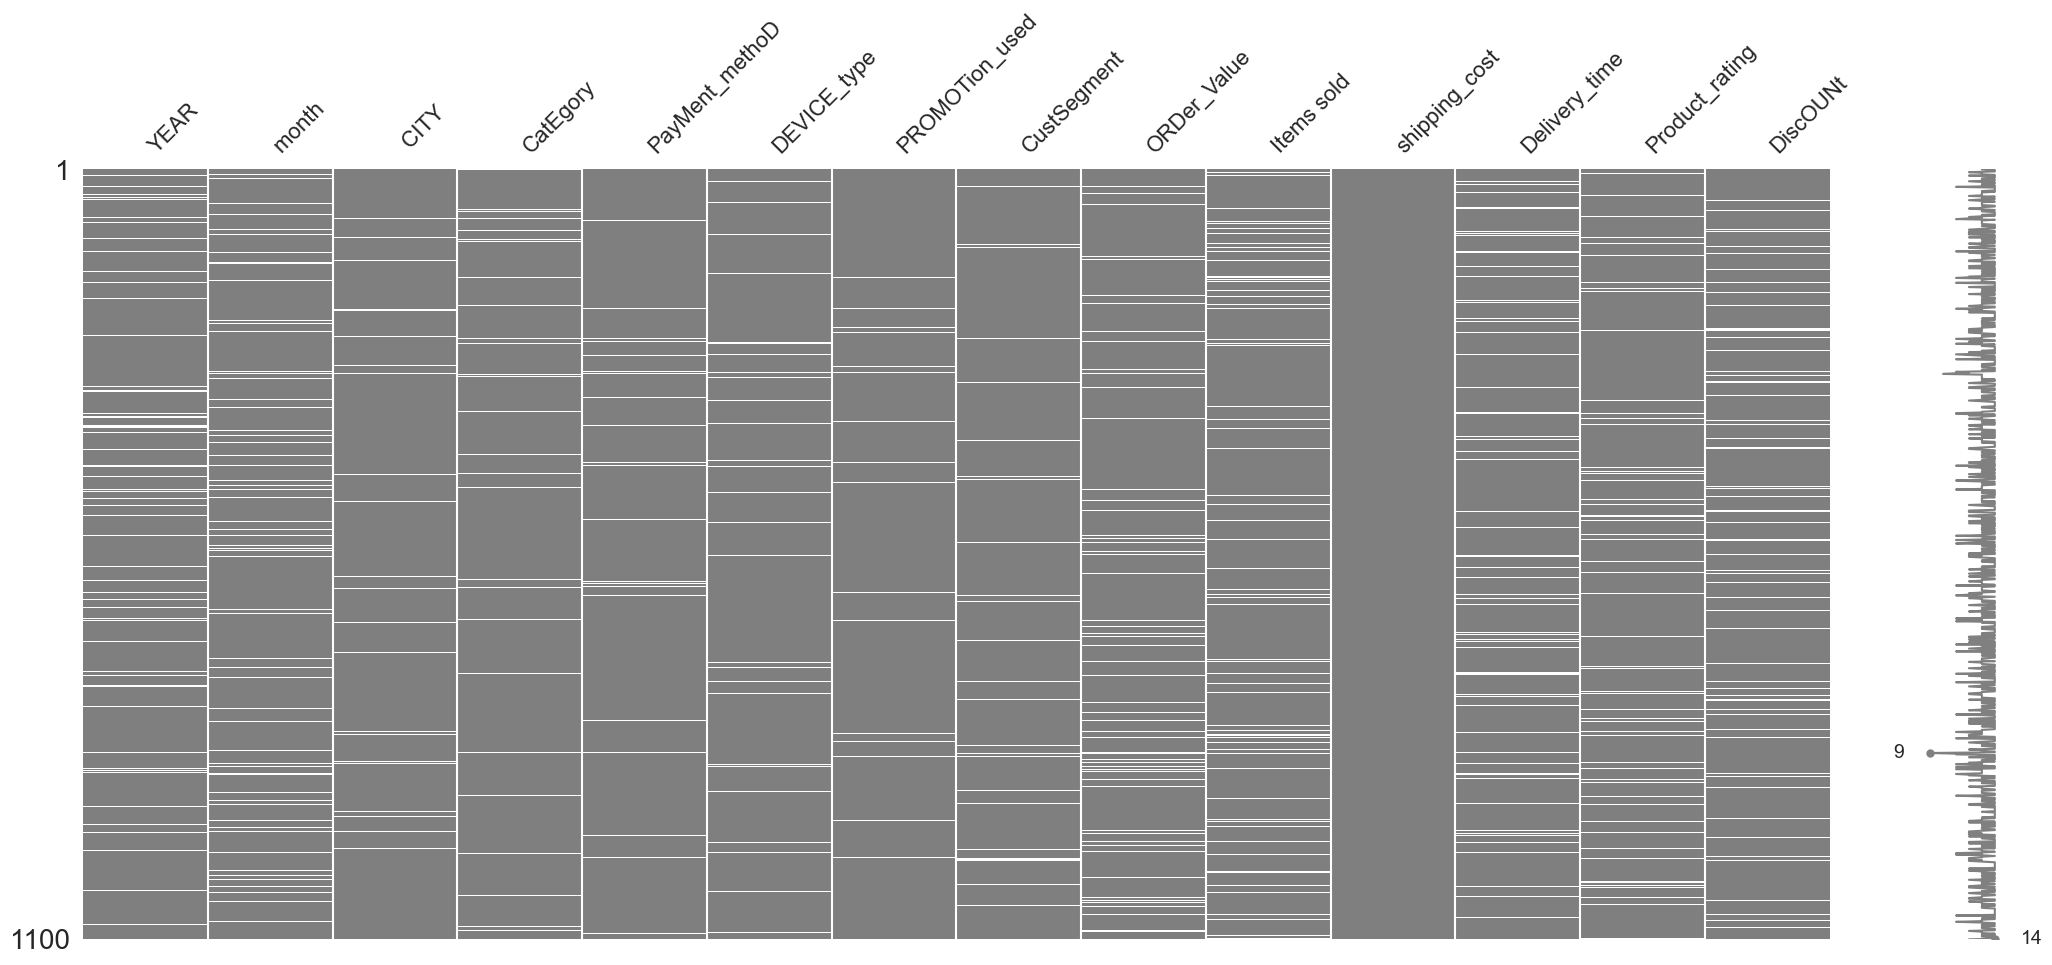

In [5]:
msno.matrix(df, color = (0.5, 0.5, 0.5))

In [6]:
df.tail()

,YEAR,month,CITY,CatEgory,PayMent_methoD,DEVICE_type,PROMOTion_used,CustSegment,ORDer_Value,Items sold,shipping_cost,Delivery_time,Product_rating,DiscOUNt
1095,2019.0,6.0,diyarbakir,@Beauty,DEBIT CARD,Desktop,NA,@Returning,369.58,NaN,18.53 TRY,1.0,4.1,96.98
1096,2017.0,12.0,Ad@n@,Clothing,E-W@ll3t,Tablet,@Yes,returning,308.40,9.0,26.38 TRY,2.0,4.3,35.76
1097,2019.0,8.0,konya,@Home,credit card,@Desktop,Y3s,RETURNING,446.99,7.0,58.41 TRY,7.0,3.1,94.61
1098,2013.0,4.0,ANKARA,Clothing,@Debit Card,DESKTOP,@Yes,@New,454.18,3.0,63.72 TRY,4.0,3.8,51.76
1099,2016.0,3.0,Kony@,clothing,na,tablet,@No,@New,202.42,NaN,14.81 TRY,6.0,NaN,48.62


In [7]:
df.describe()


,YEAR,month,ORDer_Value,Items sold,Delivery_time,Product_rating,DiscOUNt
count,1024.000000,1013.000000,1015.000000,1000.000000,1011.000000,1014.000000,1015.000000
mean,2016.387695,6.593287,284.198039,5.598000,4.057369,3.986588,44.229665
std,4.052091,3.443565,128.439806,2.764786,1.971247,0.567321,33.676211
min,2010.000000,1.000000,50.530000,1.000000,1.000000,3.000000,0.180000
25%,2013.000000,4.000000,174.585000,3.000000,2.000000,3.500000,16.865000
50%,2016.000000,7.000000,287.700000,6.000000,4.000000,4.000000,35.670000
75%,2020.000000,10.000000,394.640000,8.000000,6.000000,4.500000,66.430000
max,2023.000000,12.000000,499.760000,10.000000,7.000000,5.000000,145.120000


In [8]:
# removed empty spaces the columns names
df.columns = df.columns.str.strip() 
df = df.apply(lambda x: x.str.replace(r'\s+', ' ', regex=True) if x.dtype == "object" else x)

In [9]:
df.rename(columns={
    'YEAR': 'year',
    "CITY":"city",
    'month': 'month',
    'CatEgory': 'category',
    'PayMent_methoD': 'payment_method',
    'DEVICE_type': 'device_type',
    'PROMOTion_used': 'promotion_used',
    'CustSegment': 'customer_segment',
    'ORDer_Value': 'order_value',
    'Items sold': 'sold_items',
    'shipping_cost': 'shipping_cost',
    'Delivery_time': 'delivery_time',
    'Product_rating': 'product_rating',
    'DiscOUNt': 'discount'
}, inplace=True) # changed the names of the columns

In [10]:
columns_to_object = ['year', 'month','city','category','payment_method','device_type','promotion_used','customer_segment']
df[columns_to_object] = df[columns_to_object].astype('object') #changed datatypes

In [11]:
df['shipping_cost'] = df['shipping_cost'].replace({'TRY': '', '₺': ''}, regex=True) #removed TRY

In [12]:
columns_to_float = ['order_value', 'sold_items','shipping_cost','delivery_time','product_rating','discount']
df[columns_to_float] = df[columns_to_float].apply(pd.to_numeric, errors='coerce') #changed datatypes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1024 non-null   object 
 1   month             1013 non-null   object 
 2   city              1067 non-null   object 
 3   category          1063 non-null   object 
 4   payment_method    1070 non-null   object 
 5   device_type       1058 non-null   object 
 6   promotion_used    1070 non-null   object 
 7   customer_segment  1061 non-null   object 
 8   order_value       1015 non-null   float64
 9   sold_items        1000 non-null   float64
 10  shipping_cost     1018 non-null   float64
 11  delivery_time     1011 non-null   float64
 12  product_rating    1014 non-null   float64
 13  discount          1015 non-null   float64
dtypes: float64(6), object(8)
memory usage: 120.4+ KB


In [14]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1)) # combine month and year and assign day 1

In [15]:
df.drop(['year', 'month'], axis=1, inplace=True)
#dropped year and month

In [16]:
nonValue = ["@na","NaN","@NA","na","NA","none","None","empty","NONE",None,""]
df = df.replace(nonValue ,np.nan) # converted NaN all null values.

In [17]:
df.head()

,city,category,payment_method,device_type,promotion_used,customer_segment,order_value,sold_items,shipping_cost,delivery_time,product_rating,discount,date
0,@Bursa,NaN,Cr3dit C@rd,D3sktop,@Yes,@New,477.75,10.0,32.34,6.0,4.7,113.97,2020-04-01
1,NaN,Toys,Debit Card,Desktop,No,@Returning,369.63,4.0,34.56,2.0,4.6,103.36,2023-11-01
2,Samsun,NaN,E-W@ll3t,Desktop,No,@Returning,264.94,3.0,24.97,3.0,3.4,22.84,2011-05-01
3,diyarbakir,clothing,@E-Wallet,Mobil3,YES,NaN,353.31,8.0,36.25,4.0,3.6,59.85,2017-02-01
4,BURSA,NaN,CREDIT CARD,Desktop,YES,@Returning,NaN,6.0,43.16,4.0,4.2,7.82,2013-06-01


In [18]:
df.isnull().mean() * 100 # missing percentage


city                 6.454545
category             6.909091
payment_method       5.363636
device_type          6.727273
promotion_used       6.000000
customer_segment     7.000000
order_value          7.727273
sold_items           9.090909
shipping_cost        7.454545
delivery_time        8.090909
product_rating       7.818182
discount             7.727273
date                14.454545
dtype: float64

In [19]:
#  # of missing values in city column 
df['city'].isna().sum()

np.int64(71)

In [20]:
df["city"].unique()

array(['@Bursa', nan, 'Samsun ', 'diyarbakir', 'BURSA', 'S@msun', 'NA ',
       '@Istanbul', 'Tr@bzon', 'Malatya ', 'gaziantep', 'Diyarbakir ',
       'Van ', 'KAYSERI', 'TRABZON', 'Kayseri ', 'konya', '@Van',
       'GAZIANTEP', 'eskişehir', 'ankara', 'samsun', 'VAN', 'kayseri',
       '@Trabzon', 'Izmir', 'Istanbul ', 'Eskiş3hir', '@Ankara', '@Adana',
       'Burs@', 'bursa', 'trabzon', 'istanbul', 'M@l@ty@', '@Eskişehir',
       'van', 'V@n', 'ADANA', '@Malatya', 'K@ys3ri', '@Kayseri',
       'ESKIŞEHIR', 'DIYARBAKIR', 'Izmir ', 'KONYA', 'Antalya ',
       'Eskişehir ', 'Ankara ', 'Ank@r@', '@Samsun', 'Mersin ',
       'Gaziantep ', 'izmir', 'Ad@n@', 'ANTALYA', 'SAMSUN', 'MALATYA',
       'ANKARA', 'adana', 'M3rsin', '@Antalya', 'Diy@rb@kir', 'mersin',
       'Ist@nbul', 'Trabzon ', 'G@zi@nt3p', '@Izmir', 'Adana ', 'Ant@ly@',
       '@Diyarbakir', 'ISTANBUL', '@Konya', 'IZMIR', 'Konya ',
       '@Gaziantep', 'MERSIN', 'Kony@', 'antalya', '@Mersin', 'Bursa ',
       'malatya'], dtype

In [21]:
df['city'] = df['city'].str.strip().str.replace("@","").str.title()

In [22]:
df["city"]= df["city"].replace("Na",np.nan)

In [23]:
df["city"].unique()

array(['Bursa', nan, 'Samsun', 'Diyarbakir', 'Smsun', 'Istanbul',
       'Trbzon', 'Malatya', 'Gaziantep', 'Van', 'Kayseri', 'Trabzon',
       'Konya', 'Eskişehir', 'Ankara', 'Izmir', 'Eskiş3Hir', 'Adana',
       'Burs', 'Mlty', 'Vn', 'Kys3Ri', 'Antalya', 'Ankr', 'Mersin', 'Adn',
       'M3Rsin', 'Diyrbkir', 'Istnbul', 'Gzint3P', 'Antly', 'Kony'],
      dtype=object)

In [24]:
df["city"] = df["city"].replace({
                                     "Diyarbakir":"Diyarbakır",
                                     "Smsun":"Samsun",
                                     "Istanbul":"İstanbul",
                                     "Trbzon":"Trabzon",
                                     "Izmir":"İzmir",
                                     "Eskiş3Hir":"Eskişehir",
                                     "Burs":"Bursa",
                                     "Mlty":"Malatya",
                                     "Vn":"Van",
                                     "Kys3Ri":"Kayseri",
                                     "Ankr":"Ankara",
                                     "Adn":"Adana",
                                     "M3Rsin":"Mersin",
                                     "Diyrbkir":"Diyarbakır",
                                     "Istnbul":"İstanbul",
                                     "Gzint3P":"Gaziantep",
                                     "Antly":"Antalya",
                                    "Kony":"Konya"})

In [25]:
df["city"].unique()

array(['Bursa', nan, 'Samsun', 'Diyarbakır', 'İstanbul', 'Trabzon',
       'Malatya', 'Gaziantep', 'Van', 'Kayseri', 'Konya', 'Eskişehir',
       'Ankara', 'İzmir', 'Adana', 'Antalya', 'Mersin'], dtype=object)

In [26]:
# we have 71 missing values and we filled with mode
modeCity = df["city"].mode()[0]
modeCity #Ankara
df["city"] = df["city"].fillna(modeCity)


In [27]:
df['city'].unique()

array(['Bursa', 'Ankara', 'Samsun', 'Diyarbakır', 'İstanbul', 'Trabzon',
       'Malatya', 'Gaziantep', 'Van', 'Kayseri', 'Konya', 'Eskişehir',
       'İzmir', 'Adana', 'Antalya', 'Mersin'], dtype=object)

In [28]:
df["city"].isnull().sum() # 0 missing values

np.int64(0)

In [29]:
df.head()

,city,category,payment_method,device_type,promotion_used,customer_segment,order_value,sold_items,shipping_cost,delivery_time,product_rating,discount,date
0,Bursa,NaN,Cr3dit C@rd,D3sktop,@Yes,@New,477.75,10.0,32.34,6.0,4.7,113.97,2020-04-01
1,Ankara,Toys,Debit Card,Desktop,No,@Returning,369.63,4.0,34.56,2.0,4.6,103.36,2023-11-01
2,Samsun,NaN,E-W@ll3t,Desktop,No,@Returning,264.94,3.0,24.97,3.0,3.4,22.84,2011-05-01
3,Diyarbakır,clothing,@E-Wallet,Mobil3,YES,NaN,353.31,8.0,36.25,4.0,3.6,59.85,2017-02-01
4,Bursa,NaN,CREDIT CARD,Desktop,YES,@Returning,NaN,6.0,43.16,4.0,4.2,7.82,2013-06-01


In [30]:
df["category"].unique()

array([nan, 'Toys ', 'clothing', 'NA ', '@Clothing', 'Clothing', 'Hom3',
       'beauty', 'Beauty ', 'TOYS', 'Home ', 'El3ctronics', 'HOME',
       'BOOKS', 'B3@uty', '@Toys', 'BEAUTY', 'home', 'ELECTRONICS',
       'electronics', 'Electronics ', '@Electronics', 'Toys', 'books',
       'Books', 'Clothing ', '@Beauty', '@Home', 'Books ', '@Books',
       'CLOTHING', 'toys'], dtype=object)

In [31]:
df['category'] = df['category'].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["category"] = df["category"].replace("Na",np.nan)

In [32]:
df["category"].unique()

array([nan, 'Toys', 'Clothing', 'Home', 'Beauty', 'Electronics', 'Books',
       'Beuty'], dtype=object)

In [33]:
df["category"] = df["category"].replace("Beuty","Beauty")

In [34]:
df["category"].unique()

array([nan, 'Toys', 'Clothing', 'Home', 'Beauty', 'Electronics', 'Books'],
      dtype=object)

In [35]:
modeCategory= df["category"].mode()[0]
modeCategory #clothing
df["category"] = df["category"].fillna(modeCategory)

In [36]:
df["category"].unique()

array(['Clothing', 'Toys', 'Home', 'Beauty', 'Electronics', 'Books'],
      dtype=object)

In [37]:
df["category"].isnull().sum() # 0

np.int64(0)

In [38]:
df.head()

,city,category,payment_method,device_type,promotion_used,customer_segment,order_value,sold_items,shipping_cost,delivery_time,product_rating,discount,date
0,Bursa,Clothing,Cr3dit C@rd,D3sktop,@Yes,@New,477.75,10.0,32.34,6.0,4.7,113.97,2020-04-01
1,Ankara,Toys,Debit Card,Desktop,No,@Returning,369.63,4.0,34.56,2.0,4.6,103.36,2023-11-01
2,Samsun,Clothing,E-W@ll3t,Desktop,No,@Returning,264.94,3.0,24.97,3.0,3.4,22.84,2011-05-01
3,Diyarbakır,Clothing,@E-Wallet,Mobil3,YES,NaN,353.31,8.0,36.25,4.0,3.6,59.85,2017-02-01
4,Bursa,Clothing,CREDIT CARD,Desktop,YES,@Returning,NaN,6.0,43.16,4.0,4.2,7.82,2013-06-01


In [39]:
df["payment_method"].unique() 

array(['Cr3dit C@rd', 'Debit Card ', 'E-W@ll3t', '@E-Wallet',
       'CREDIT CARD', 'NA ', 'cash on delivery', 'E-Wallet ',
       '@Credit Card', nan, 'D3bit C@rd', '@Cash on Delivery',
       'Cash on Delivery ', 'DEBIT CARD', 'E-WALLET', '@Debit Card',
       'Credit Card ', 'credit card', 'CASH ON DELIVERY', 'debit card',
       'e-wallet', 'C@sh on D3liv3ry'], dtype=object)

In [40]:
df['payment_method'] = df['payment_method'].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["payment_method"] = df["payment_method"].replace("Na",np.nan)

In [41]:
df['payment_method'].unique()

array(['Credit Crd', 'Debit Card', 'E-Wllet', 'E-Wallet', 'Credit Card',
       nan, 'Cash On Delivery', 'Debit Crd', 'Csh On Delivery'],
      dtype=object)

In [42]:
df['payment_method'] = df['payment_method'].replace({"Credit Crd":"Credit Card",
                                                     "E-Wllet":"E-Wallet",
                                                     "Csh On Delivery":"Cash On Delivery",
                                                     "Debit Crd":"Debit Card",
                                                     })

In [43]:
df['payment_method'].unique()

array(['Credit Card', 'Debit Card', 'E-Wallet', nan, 'Cash On Delivery'],
      dtype=object)

In [44]:
mode_payment_method= df["payment_method"].mode()[0]
mode_payment_method #credit card
df["payment_method"] = df["payment_method"].fillna(modeCategory)

In [45]:
df["payment_method"].isnull().sum() # 0

np.int64(0)

In [46]:
df.head()

,city,category,payment_method,device_type,promotion_used,customer_segment,order_value,sold_items,shipping_cost,delivery_time,product_rating,discount,date
0,Bursa,Clothing,Credit Card,D3sktop,@Yes,@New,477.75,10.0,32.34,6.0,4.7,113.97,2020-04-01
1,Ankara,Toys,Debit Card,Desktop,No,@Returning,369.63,4.0,34.56,2.0,4.6,103.36,2023-11-01
2,Samsun,Clothing,E-Wallet,Desktop,No,@Returning,264.94,3.0,24.97,3.0,3.4,22.84,2011-05-01
3,Diyarbakır,Clothing,E-Wallet,Mobil3,YES,NaN,353.31,8.0,36.25,4.0,3.6,59.85,2017-02-01
4,Bursa,Clothing,Credit Card,Desktop,YES,@Returning,NaN,6.0,43.16,4.0,4.2,7.82,2013-06-01


<Axes: >

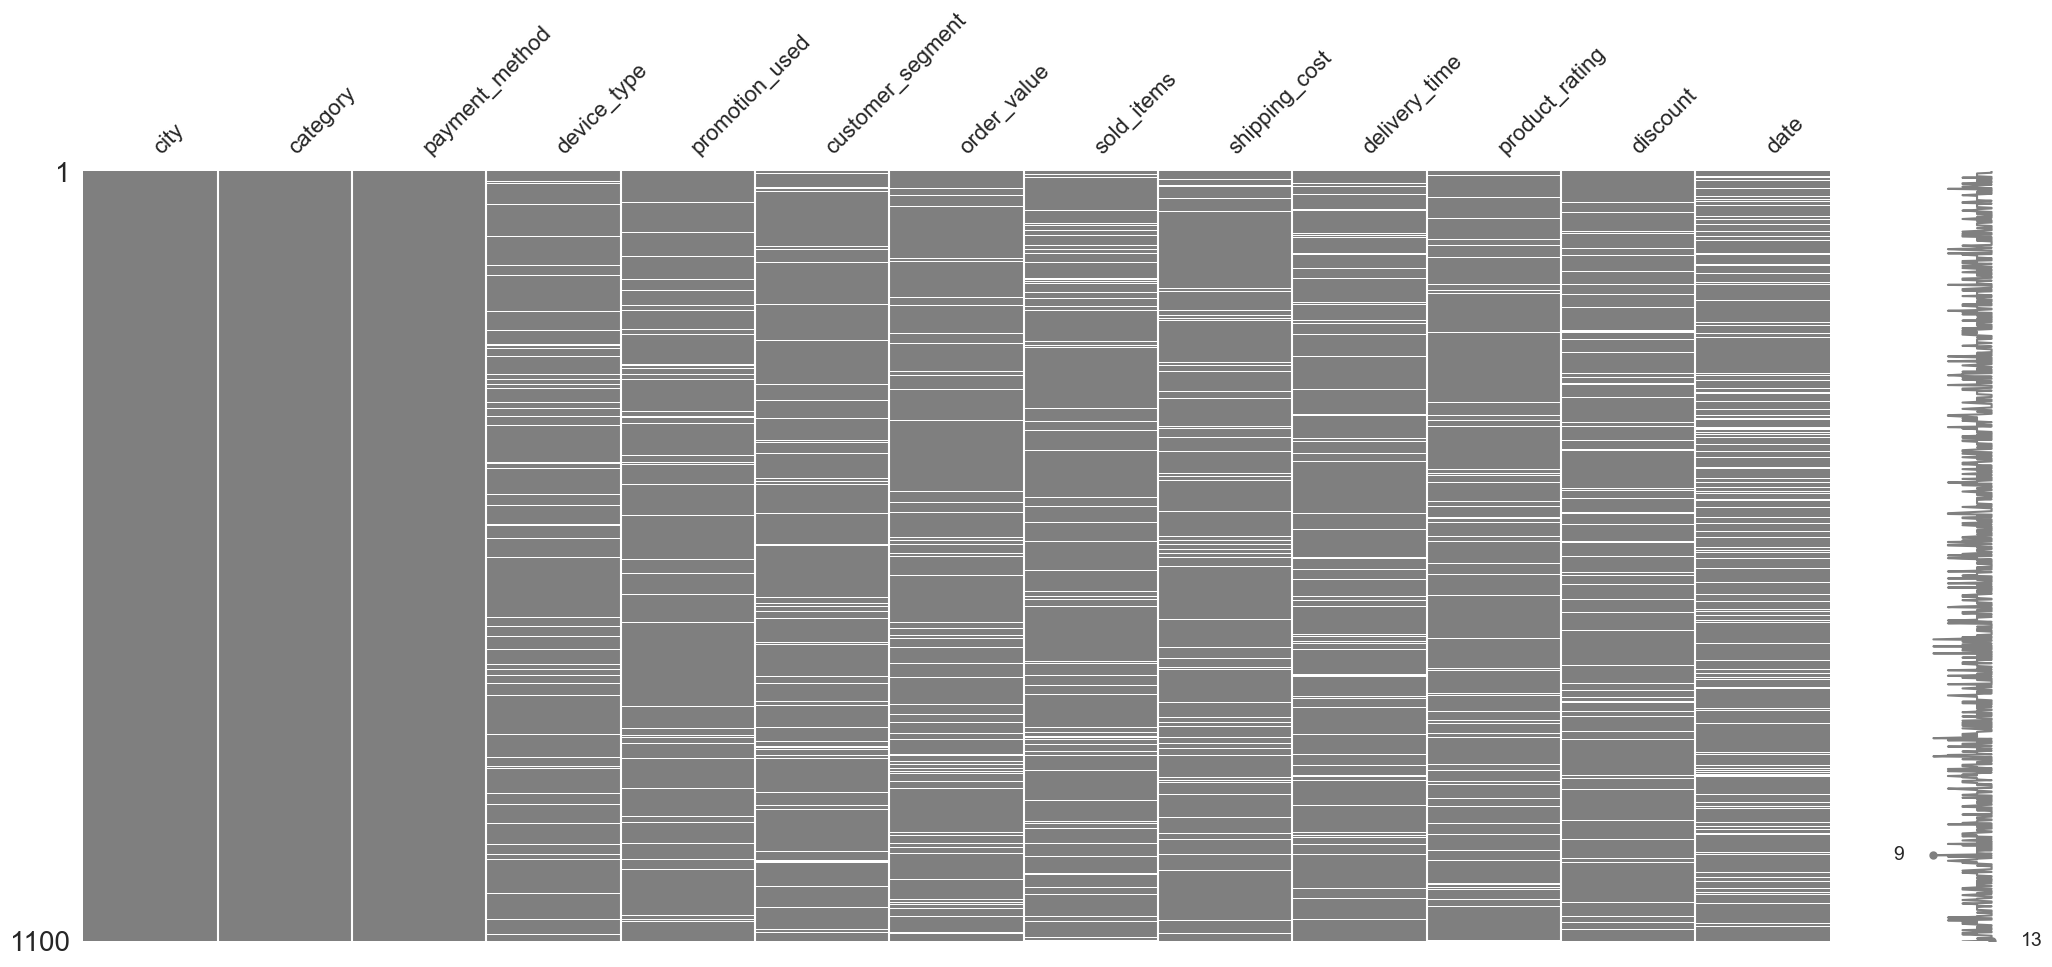

In [47]:
msno.matrix(df, color = (0.5, 0.5, 0.5))

In [48]:
df["device_type"].unique()

array(['D3sktop', 'Desktop ', 'Mobil3', 'desktop', 'Tablet ', 'TABLET',
       'tablet', 'Mobile ', nan, 'T@bl3t', 'mobile', 'NA ', 'DESKTOP',
       '@Mobile', '@Desktop', '@Tablet', 'MOBILE'], dtype=object)

In [49]:
df["device_type"] = df["device_type"].str.strip().str.replace("@","").str.replace("3","e").str.title()
df["device_type"] = df["device_type"].replace("Na",np.nan)
df["device_type"].unique()

array(['Desktop', 'Mobile', 'Tablet', nan, 'Tblet'], dtype=object)

In [51]:
df["device_type"] = df["device_type"].replace("Tblet","Tablet")

In [52]:
df["device_type"].isnull().sum()

np.int64(95)

In [56]:
#we have 95 null values and we imputated with mode
modeDevice = df["device_type"].mode()[0]
modeDevice #Desktop
df["device_type"]=df["device_type"].fillna(modeDevice)

In [ ]:
df["device_type"].isnull().sum() # 0

np.int64(0)

In [60]:
df.head()

,city,category,payment_method,device_type,promotion_used,customer_segment,order_value,sold_items,shipping_cost,delivery_time,product_rating,discount,date
0,Bursa,Clothing,Credit Card,Desktop,@Yes,@New,477.75,10.0,32.34,6.0,4.7,113.97,2020-04-01
1,Ankara,Toys,Debit Card,Desktop,No,@Returning,369.63,4.0,34.56,2.0,4.6,103.36,2023-11-01
2,Samsun,Clothing,E-Wallet,Desktop,No,@Returning,264.94,3.0,24.97,3.0,3.4,22.84,2011-05-01
3,Diyarbakır,Clothing,E-Wallet,Mobile,YES,NaN,353.31,8.0,36.25,4.0,3.6,59.85,2017-02-01
4,Bursa,Clothing,Credit Card,Desktop,YES,@Returning,NaN,6.0,43.16,4.0,4.2,7.82,2013-06-01
